In [1]:
#!conda install -c fastai -c pytorch -c anaconda fastai anaconda

from fastai.callback.all import *
from fastai.vision.all import *
from fastai.vision.gan import *
import torch
torch.cuda.is_available()

True

In [2]:
dblock = DataBlock(blocks=(TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items=get_image_files,
                   splitter=IndexSplitter([]),
                   item_tfms=Resize(256, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])),
                   #splitter=RandomSplitter(),
                   #item_tfms=RandomResizedCrop(256),
                   #batch_tfms=aug_transforms( mult=1, min_scale=0.5, size=1024)
                  )
#path = untar_data(URLs.LSUN_BEDROOMS)
#dls = dblock.dataloaders(path, path=path, bs=128)
dls = dblock.dataloaders("training", path="training", bs=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


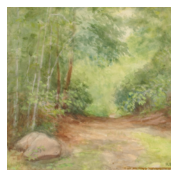

In [3]:
dls.show_batch(max_n=16)

In [4]:
generator = basic_generator(256, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (256, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [5]:
learn.fit(1, 2e-4, wd=0.)

D:\Programs\conda\lib\site-packages\fastai\callback\core.py:50: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
D:\Programs\conda\lib\site-packages\fastai\callback\core.py:50: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
D:\Programs\conda\lib\site-packages\fastai\callback\core.py:50: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-0.594928,0.336162,-0.913625,00:02


D:\Programs\conda\lib\site-packages\fastprogress\fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


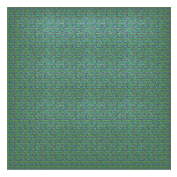

In [6]:
learn.show_results(max_n=10, ds_idx=0)

Setting-up type transforms pipelines
Found 12 items
2 datasets of sizes 12,0
Setting up Pipeline: generate_noise
Setting up Pipeline: PILBase.create

Building one sample
  Pipeline: generate_noise
    starting from
      training\cancel-via-fb.png
    applying generate_noise gives
      InvisibleTensor of size 100
  Pipeline: PILBase.create
    starting from
      training\cancel-via-fb.png
    applying PILBase.create gives
      PILImage mode=RGB size=1920x2307

Final sample: (InvisibleTensor([-0.7860,  1.4164, -0.6366, -0.0773, -0.5474, -1.8672, -0.5697,  0.2976,
         3.0317, -0.5177, -0.1484,  2.0374, -1.2262, -0.0448, -0.8805, -0.0281,
         0.5626, -0.3310, -1.2261,  0.5280,  0.8544,  1.8522,  1.3271,  0.7932,
        -0.1378, -0.0195, -0.2899, -1.2414, -0.2790,  1.7838,  0.5826,  0.4598,
         0.6982, -0.5364, -0.5845,  0.6847, -1.9033,  0.3179, -1.3725, -1.9861,
        -0.2264, -0.8949,  0.2447, -1.4730, -0.0439, -0.6461,  0.0892,  0.1606,
        -1.2318,  0.8901,  0

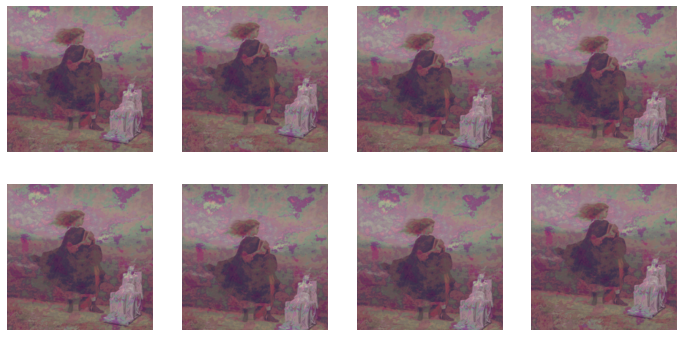

In [7]:
dblock.summary('training', bs=8, show_batch=True, unique=True)